In [1]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

Loss after iteration 0: 0.669614
Loss after iteration 1000: 1.781321
Loss after iteration 2000: 2.170356
Loss after iteration 3000: 2.277625
Loss after iteration 4000: 2.329823
Loss after iteration 5000: 2.358821
Loss after iteration 6000: 2.375278
Loss after iteration 7000: 2.384692
Loss after iteration 8000: 2.390094
Loss after iteration 9000: 2.393185
Loss after iteration 10000: 2.394932
Loss after iteration 11000: 2.395897
Loss after iteration 12000: 2.396408
Loss after iteration 13000: 2.396659
Loss after iteration 14000: 2.396764
Loss after iteration 15000: 2.396790
Loss after iteration 16000: 2.396775
Loss after iteration 17000: 2.396742
Loss after iteration 18000: 2.396702
Loss after iteration 19000: 2.396662


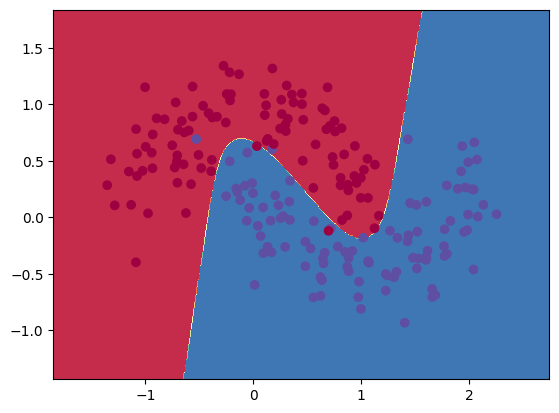

In [2]:
#__author__ = 'tan_nguyen'
def generate_data():
    '''
    generate data
    :return: X: input data, y: given labels
    '''
    np.random.seed(0)
    X, y = datasets.make_moons(200, noise=0.20)
    return X, y

def plot_decision_boundary(pred_func, X, y):
    '''
    plot the decision boundary
    :param pred_func: function used to predict the label
    :param X: input data
    :param y: given labels
    :return:
    '''
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

########################################################################################################################
########################################################################################################################
# YOUR ASSSIGMENT STARTS HERE
# FOLLOW THE INSTRUCTION BELOW TO BUILD AND TRAIN A 3-LAYER NEURAL NETWORK
########################################################################################################################
########################################################################################################################
class NeuralNetwork(object):
    """
    This class builds and trains a neural network
    """
    def __init__(self, nn_input_dim, nn_hidden_dim , nn_output_dim, actFun_type='tanh', reg_lambda=0.01, seed=0):
        '''
        :param nn_input_dim: input dimension
        :param nn_hidden_dim: the number of hidden units
        :param nn_output_dim: output dimension
        :param actFun_type: type of activation function. 3 options: 'tanh', 'sigmoid', 'relu'
        :param reg_lambda: regularization coefficient
        :param seed: random seed
        '''
        self.nn_input_dim = nn_input_dim
        self.nn_hidden_dim = nn_hidden_dim
        self.nn_output_dim = nn_output_dim
        self.actFun_type = actFun_type
        self.reg_lambda = reg_lambda
        
        # initialize the weights and biases in the network
        np.random.seed(seed)
        self.W1 = np.random.randn(self.nn_input_dim, self.nn_hidden_dim) / np.sqrt(self.nn_input_dim)
        self.b1 = np.zeros((1, self.nn_hidden_dim))
        self.W2 = np.random.randn(self.nn_hidden_dim, self.nn_output_dim) / np.sqrt(self.nn_hidden_dim)
        self.b2 = np.zeros((1, self.nn_output_dim))

    def actFun(self, z, type):
        '''
        actFun computes the activation functions
        :param z: net input
        :param type: Tanh, Sigmoid, or ReLU
        :return: activations
        '''
        type = str(type).strip().lower()
        if type == 'tanh':
            return np.tanh(z)
        elif type == 'sigmoid':
            return 1 / (1 + np.exp(-z))
        elif type == 'relu':
            return np.maximum(0, z)
        else:
            raise ValueError("Invalid type: type must be 'Tanh', 'Sigmoid', or 'ReLU'.")
        # YOU IMPLMENT YOUR actFun HERE
        

        return None

    def diff_actFun(self, z, type):
        '''
        diff_actFun computes the derivatives of the activation functions wrt the net input
        :param z: net input
        :param type: Tanh, Sigmoid, or ReLU
        :return: the derivatives of the activation functions wrt the net input
        '''

        # YOU IMPLEMENT YOUR diff_actFun HERE
        type = str(type).strip().lower()
        if type == 'tanh':
            return 1 - np.tanh(z) ** 2
        elif type == 'sigmoid':
            s = 1 / (1 + np.exp(-z))
            return s * (1 - s)
        elif type == 'relu':
            return (z > 0).astype(float)
        else:
            raise ValueError("Invalid type: type must be tanh, Sigmoid or ReLU.")


    def feedforward(self, X, actFun):
        '''
        feedforward builds a 3-layer neural network and computes the two probabilities,
        one for class 0 and one for class 1
        :param X: input data
        :param actFun: activation function
        :return:
        '''

        # YOU IMPLEMENT YOUR feedforward HERE

        self.z1 = X @ self.W1 + self.b1
        self.a1 = actFun(self.z1)
        self.z2 =  self.a1 @ self.W2 + self.b2

        exp_scores = np.exp(self.z2)
        self.probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return None

    def calculate_loss(self, X, y):
        '''
        calculate_loss computes the loss for prediction
        :param X: input data
        :param y: given labels
        :return: the loss for prediction
        '''
        num_examples = len(X)
        self.feedforward(X, lambda x: self.actFun(x, type=self.actFun_type))
        # Calculating the loss

        # YOU IMPLEMENT YOUR CALCULATION OF THE LOSS HERE

        N, C = self.probs.shape


        eps = 1e-12
        y_onehot = np.eye(C)[y]  
        data_loss = -np.sum(y_onehot * np.log(self.probs + eps))/ num_examples

        # Add regulatization term to loss (optional)
        data_loss += self.reg_lambda / 2 * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))
        return data_loss

    def predict(self, X):
        '''
        predict infers the label of a given data point X
        :param X: input data
        :return: label inferred
        '''
        self.feedforward(X, lambda x: self.actFun(x, type=self.actFun_type))
        return np.argmax(self.probs, axis=1)

    def backprop(self, X, y):
        '''
        backprop implements backpropagation to compute the gradients used to update the parameters in the backward step
        :param X: input data
        :param y: given labels
        :return: dL/dW1, dL/b1, dL/dW2, dL/db2
        '''

        # IMPLEMENT YOUR BACKPROP HERE
        num_examples = len(X)
        delta3 = self.probs
        delta3[range(num_examples), y] -= 1

        dW2 = self.a1.T @ delta3
        db2 = delta3.sum(axis=0)

        # Hidden layer (layer 2)
        delta2 = (delta3 @ self.W2.T) * self.diff_actFun(self.z1, type=self.actFun_type)
        dW1 = X.T @ delta2
        db1 = delta2.sum(axis=0)
        # dW2 = dL/dW2
        # db2 = dL/db2
        # dW1 = dL/dW1
        # db1 = dL/db1
        return dW1, dW2, db1, db2

    def fit_model(self, X, y, epsilon=0.01, num_passes=20000, print_loss=True):
        '''
        fit_model uses backpropagation to train the network
        :param X: input data
        :param y: given labels
        :param num_passes: the number of times that the algorithm runs through the whole dataset
        :param print_loss: print the loss or not
        :return:
        '''
        # Gradient descent.
        for i in range(0, num_passes):
            # Forward propagation
            self.feedforward(X, lambda x: self.actFun(x, type=self.actFun_type))
            # Backpropagation
            dW1, dW2, db1, db2 = self.backprop(X, y)

            # Add regularization terms (b1 and b2 don't have regularization terms)
            dW2 += self.reg_lambda * self.W2
            dW1 += self.reg_lambda * self.W1

            # Gradient descent parameter update
            self.W1 += -epsilon * dW1
            self.b1 += -epsilon * db1
            self.W2 += -epsilon * dW2
            self.b2 += -epsilon * db2

            # Optionally print the loss.
            # This is expensive because it uses the whole dataset, so we don't want to do it too often.
            if print_loss and i % 1000 == 0:
                print("Loss after iteration %i: %f" % (i, self.calculate_loss(X, y)))

    def visualize_decision_boundary(self, X, y):
        '''
        visualize_decision_boundary plots the decision boundary created by the trained network
        :param X: input data
        :param y: given labels
        :return:
        '''
        plot_decision_boundary(lambda x: self.predict(x), X, y)

def main():
    # # generate and visualize Make-Moons dataset
    X, y = generate_data()
    # plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    # plt.show()

    model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=3 , nn_output_dim=2, actFun_type='sigmoid')
    model.fit_model(X,y)
    model.visualize_decision_boundary(X,y)

if __name__ == "__main__":
    main()

In [42]:
def _fan_in_out(shape):
    if len(shape) != 2:
        raise ValueError("Only 2D weight matrices supported for dense layers.")
    fan_in, fan_out = shape
    return fan_in, fan_out

def xavier_normal(shape, rng):
    fan_in, fan_out = _fan_in_out(shape)
    std = np.sqrt(2.0 / (fan_in + fan_out))
    return rng.normal(0.0, std, size=shape)

def he_normal(shape, rng, negative_slope=0.0):
    # He/Kaiming for ReLU-like activations; gain accounts for leaky slope
    fan_in, _ = _fan_in_out(shape)
    gain = np.sqrt(2.0 / (1.0 + negative_slope**2))
    std = gain / np.sqrt(fan_in)
    return rng.normal(0.0, std, size=shape)

def choose_initializer(act, negative_slope=0.0):
    t = str(act).strip().lower()
    if t in ("relu", "gelu", "leaky_relu"):
        return lambda shape, rng: he_normal(shape, rng, negative_slope)
    # default safe choice for tanh/sigmoid/linear
    return xavier_normal

# -------------------------
# Activation functions
# -------------------------

# def act_forward(z, kind):
#     k = str(kind).strip().lower()
#     if k == "relu":
#         return np.maximum(0.0, z)
#     if k == "leaky_relu":
#         return np.where(z > 0, z, 0.01 * z)
#     if k == "tanh":
#         return np.tanh(z)
#     if k == "sigmoid":
#         return 1.0 / (1.0 + np.exp(-z))
#     if k in ("linear", "identity", "none"):
#         return z
#     raise ValueError(f"Unknown activation '{kind}'.")

# def act_backward(z, kind):
#     k = str(kind).strip().lower()
#     if k == "relu":
#         return (z > 0).astype(z.dtype)
#     if k == "leaky_relu":
#         return np.where(z > 0, 1.0, 0.01)
#     if k == "tanh":
#         t = np.tanh(z)
#         return 1.0 - t * t
#     if k == "sigmoid":
#         s = 1.0 / (1.0 + np.exp(-z))
#         return s * (1.0 - s)
#     if k in ("linear", "identity", "none"):
#         return np.ones_like(z)
#     raise ValueError(f"Unknown activation '{kind}'.")
def act_forward(z, kind):
    k = str(kind).strip().lower()
    if k == "relu":
        return np.maximum(0.0, z)
    if k == "tanh":
        return np.tanh(z)
    if k == "sigmoid":
        return 1.0 / (1.0 + np.exp(-z))
    if k in ("linear", "identity", "none"):
        return z
    raise ValueError(f"Unknown activation '{kind}'.")

def act_backward(z, kind):
    k = str(kind).strip().lower()
    if k == "relu":
        return (z > 0).astype(z.dtype)
    if k == "tanh":
        t = np.tanh(z)
        return 1.0 - t * t
    if k == "sigmoid":
        s = 1.0 / (1.0 + np.exp(-z))
        return s * (1.0 - s)
    if k in ("linear", "identity", "none"):
        return np.ones_like(z)
    raise ValueError(f"Unknown activation '{kind}'.")

In [37]:
import numpy as np

class Layer:
    def __init__(self, d_in, d_out, act="relu", rng=None, mu=0.0, sigma=0.01):
        """
        Always initialize weights with a Gaussian N(mu, sigma^2).
        d_in, d_out: input/output dims
        act: activation name used by act_forward/act_backward
        rng: optional np.random.Generator; if None, a new default_rng() is used
        """
        self.act = act
        self.rng = rng or np.random.default_rng()

        # --- Gaussian initializer only ---
        self.w = self.rng.normal(loc=mu, scale=sigma, size=(d_in, d_out)).astype(np.float32)
        self.b = np.zeros((d_out,), dtype=np.float32)

        # caches for backprop
        self.X = None   # (N, d_in)
        self.z = None   # (N, d_out)
        self.a = None   # (N, d_out)

        # optional optimizer state (e.g., momentum)
        self.vw = np.zeros_like(self.w)
        self.vb = np.zeros_like(self.b)

    def forward(self, X):
        self.X = X
        self.z = X @ self.w + self.b           # (N, d_out), bias broadcasts
        self.a = act_forward(self.z, self.act) # assumes you defined act_forward
        return self.a

    def backprop(self, delta_a):
        """
        delta_a: ∂L/∂a for this layer's output, shape (N, d_out)
        Returns: (dW, dB, delta_prev)
        """
        delta_z = delta_a * act_backward(self.z, self.act)  # assumes act_backward defined
        dW = self.X.T @ delta_z                             # (d_in, d_out)
        dB = delta_z.sum(axis=0)                            # (d_out,)
        delta_prev = delta_z @ self.w.T                     # (N, d_in)
        return dW, dB, delta_prev


In [38]:
class Layer:
    def __init__(self, d_in, d_out, act="relu", rng=None, negative_slope=0.0):
        if rng is None:
            rng = np.random.default_rng()
        self.act = act
        self.negative_slope = negative_slope

        init = choose_initializer(act, negative_slope)
        self.w = init((d_in, d_out), rng)         # (d_in, d_out)
        self.b = np.zeros((d_out,), dtype=float)  # (d_out,)

        # caches for backprop
        self.X = None   # (N, d_in)
        self.z = None   # (N, d_out)
        self.a = None   # (N, d_out)

        # optional optimizer state (momentum)
        self.vw = np.zeros_like(self.w)
        self.vb = np.zeros_like(self.b)

    def forward(self, X):
        self.X = X
        self.z = X @ self.w + self.b   # broadcast b across batch
        self.a = act_forward(self.z, self.act)
        return self.a

    def backprop(self, delta_a):
        """
        Input:
          delta_a = ∂L/∂a (N, d_out)
        Returns:
          dW, dB, delta_prev
        """
        delta_z = delta_a * act_backward(self.z, self.act)   # (N, d_out)
        dW = self.X.T @ delta_z                              # (d_in, d_out)
        dB = delta_z.sum(axis=0)                             # (d_out,)
        delta_prev = delta_z @ self.w.T                      # (N, d_in)
        return dW, dB, delta_prev

In [39]:
#__author__ = 'tan_nguyen'
def generate_data():
    '''
    generate data
    :return: X: input data, y: given labels
    '''
    np.random.seed(0)
    X, y = datasets.make_moons(200, noise=0.20)
    # X, y = datasets.make_circles(200, noise = 0.2)
    return X, y

def plot_decision_boundary(pred_func, X, y):
    '''
    plot the decision boundary
    :param pred_func: function used to predict the label
    :param X: input data
    :param y: given labels
    :return:
    '''
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()


In [40]:
class N_Layer_Neural_Network:
    def __init__(self, dims, activations, seed=0, reg_lambda=0.0, use_momentum=False, momentum=0.9):
        """
        dims: [d0, d1, ..., dL]
        activations: list of length L; e.g., ['relu', 'relu', 'linear']
          - final 'linear' pairs with softmax outside for classification
        """
        assert len(dims) >= 2, "Provide at least input and output dims."
        assert len(activations) == len(dims) - 1, "One activation per layer."

        self.L = len(dims) - 1
        self.reg_lambda = float(reg_lambda)
        self.use_momentum = use_momentum
        self.momentum = float(momentum)

        rng_master = np.random.default_rng(seed)
        seeds = rng_master.integers(0, 2**31 - 1, size=self.L)

        self.layers = []
        for i in range(self.L):
            d_in, d_out = dims[i], dims[i+1]
            act = activations[i]
            rng = np.random.default_rng(int(seeds[i]))
            self.layers.append(Layer(d_in, d_out, act=act, rng=rng))

    # ----- forward -----

    def forward_logits(self, X):
        """Forward through all layers; returns final activations (logits if last act is linear)."""
        A = X
        for layer in self.layers:
            A = layer.forward(A)
        return A

    @staticmethod
    def softmax(logits):
        z = logits - np.max(logits, axis=1, keepdims=True)  # stability
        ex = np.exp(z)
        return ex / np.sum(ex, axis=1, keepdims=True)

    def forward_probs(self, X):
        """Softmax probabilities (use when final activation is linear)."""
        logits = self.forward_logits(X)
        return self.softmax(logits)

    # ----- loss -----

    def loss_cross_entropy(self, X, y):
        """
        y: integer class labels (N,)
        returns scalar loss
        """
        probs = self.forward_probs(X)               # (N, C)
        N = probs.shape[0]
        eps = 1e-12
        ll = -np.log(probs[np.arange(N), y] + eps)  # per-example negative log-likelihood
        data_loss = float(np.mean(ll))
        reg = 0.0
        if self.reg_lambda:
            reg = (self.reg_lambda / 2.0) * sum(np.sum(layer.w**2) for layer in self.layers)
        return data_loss + reg

    # ----- backprop -----

    def _delta_last_softmax_ce(self, X, y):
        """
        For softmax + cross-entropy with linear logits:
        delta_a_last = (probs - one_hot(y)) / N
        """
        probs = self.forward_probs(X)               # (N, C)
        N, C = probs.shape
        y_onehot = np.eye(C)[y]
        delta_last = (probs - y_onehot) / N
        return delta_last

    def backprop(self, X, y):
        """
        Computes gradients for all layers (softmax+CE head).
        Returns:
          dWs, dBs lists aligned with self.layers
        """
        dA = self._delta_last_softmax_ce(X, y)
        dWs = [None] * self.L
        dBs = [None] * self.L

        # Walk layers backward
        for l in range(self.L - 1, -1, -1):
            dW, dB, dA = self.layers[l].backprop(dA)
            # L2 on weights only
            if self.reg_lambda:
                dW = dW + self.reg_lambda * self.layers[l].w
            dWs[l], dBs[l] = dW, dB

        return dWs, dBs

    # ----- optimizer step (SGD or SGD+momentum) -----

    def step(self, dWs, dBs, lr=1e-2):
        if not self.use_momentum:
            for l, layer in enumerate(self.layers):
                layer.w -= lr * dWs[l]
                layer.b -= lr * dBs[l]
        else:
            mu = self.momentum
            for l, layer in enumerate(self.layers):
                layer.vw = mu * layer.vw - lr * dWs[l]
                layer.vb = mu * layer.vb - lr * dBs[l]
                layer.w += layer.vw
                layer.b += layer.vb

    # ----- training helpers -----

    def fit_model(self, X, y, lr=1e-2, epochs=1000, verbose_every=100, X_val=None, y_val=None):
        """
        Full-batch (batch gradient descent) training loop.
        No mini-batching or shuffling; each epoch uses the entire dataset.
        """
        for epoch in range(1, epochs + 1):
            # compute full-batch gradients and update
            dWs, dBs = self.backprop(X, y)
            self.step(dWs, dBs, lr)

            # optional logging
            if verbose_every and (epoch % verbose_every == 0):
                train_loss = self.loss_cross_entropy(X, y)
                msg = f"[epoch {epoch}] train_loss={train_loss:.4f}"
                if X_val is not None and y_val is not None:
                    val_loss = self.loss_cross_entropy(X_val, y_val)
                    val_acc = self.accuracy(X_val, y_val)
                    msg += f" | val_loss={val_loss:.4f} val_acc={val_acc:.3f}"
                print(msg)

    def predict(self, X):
        probs = self.forward_probs(X)
        return np.argmax(probs, axis=1)

    def accuracy(self, X, y):
        return float((self.predict(X) == y).mean())
    
    def visualize_decision_boundary(self, X, y):
        plot_decision_boundary(lambda x: self.predict(x), X, y)

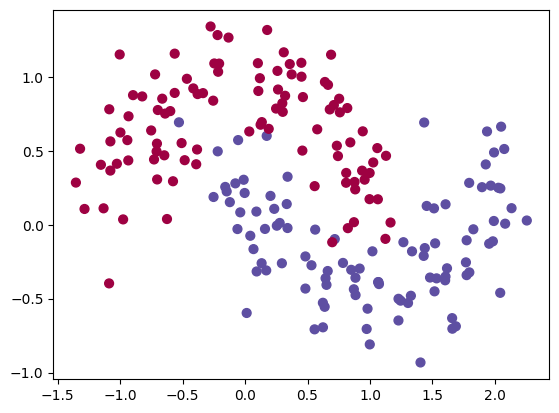

[epoch 100] train_loss=0.4005
[epoch 200] train_loss=0.3082
[epoch 300] train_loss=0.2765
[epoch 400] train_loss=0.2598
[epoch 500] train_loss=0.2485
[epoch 600] train_loss=0.2400
[epoch 700] train_loss=0.2331
[epoch 800] train_loss=0.2272
[epoch 900] train_loss=0.2221
[epoch 1000] train_loss=0.2173


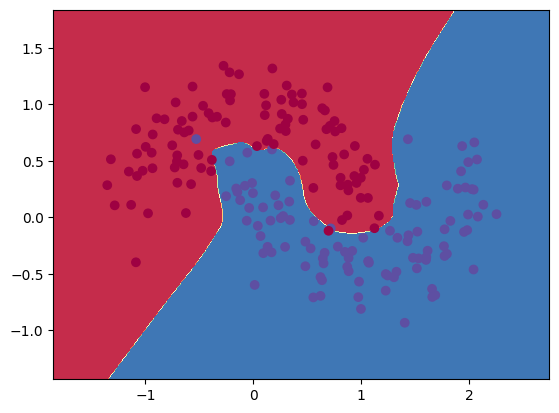

In [43]:
def main():
    # # generate and visualize Make-Moons dataset
    X, y = generate_data()
    plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    plt.show()

    d_in = 2
    n_classes =2
    dims = [d_in, 64, 64,64, 32, n_classes]
    acts = ["relu", "relu","tanh","relu", "linear"]
    model = N_Layer_Neural_Network(dims, acts, seed=42, reg_lambda=1e-3, use_momentum=True)
    model.fit_model(X,y)
    model.visualize_decision_boundary(X,y)

if __name__ == "__main__":
    main()